<a href="https://colab.research.google.com/github/AdrianAlbrecht/AiSD_20-21/blob/main/SSI_Grupowanie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import math

In [27]:
def euklides(lista_1, lista_2):
  wynik = 0
  if len(lista_1) == len(lista_2):
    for i in range(len(lista_1)):
      wynik+= (lista_1[i] - lista_2[i])**2
    return math.sqrt(wynik)
  return -1

In [28]:
print(euklides([1,2],[5,14]))

12.649110640673518


In [29]:
values = np.loadtxt("spirala.txt", skiprows=0, dtype='double')
headers = pd.read_table("spirala-type.txt", header = None)
df = pd.DataFrame(values)
df.columns = list(headers[0])
df

,x,y
0,-0.0824,0.9435
1,0.0913,0.9575
2,0.0476,1.0683
3,0.2311,1.0452
4,0.2269,0.9615
...,...,...
96,-0.5031,1.8191
97,-0.3340,1.8515
98,-0.3200,1.9158
99,-0.2074,1.9929


In [30]:
df['class'] = -1
df = df.values.tolist()

Algorytm tworzy k grup, każda z tych grup posiada środek (średnią z grupy). Algorytm działa w ten sposób, iż przez zadaną liczbę iteracji na przemian określa dla każdej próbki do której z grup należy (czyli do którego z k środków ma najbliżej) a następnie dla każdej z poprzednio ustalonej grupy wyznacza osobno środek. Algorytm do poprawnego zadania musi zawierać informację n/t środków k grup oraz musi posiadać informację n/t tego, które próbki mają najbliżej do danej grupy. Start algorytmu, liczba grup, iteracji i miara odległości nie jest z góry ustalona. W tym przykładzie polecam użyć 4 grup (m=4), 100 iteracji miary odległości euklidesowej, a na początku ustalenie środka grup równe losowo wybranej grupie różnych próbek.

Algorytm zapisany w postaci pseudokodu:

1. Wybierz losowo m różnych próbek i uznaj je jako środki grup (V)

2. Pętla wykonywana zadaną liczbę iteracji (iters)

2.1. Pętla po wszystkich M próbkach, s to indeks aktualnej próbki

2.1.1. Wylicz odległości między próbką s a każdym środkiem grupy (V)

2.1.2. Wyznacz us równy indeksowi najbliższego środka grupy dla s-tej próbki

2.2. Pętla po wszystkich m grupach, j to indeks aktualnej grupy

2.2.1. Wybierz próbki, należące do tej grupy (zbiór próbek o indeksach s, takich, że us == j), niech zbiór ten nazywa się Xgr

2.2.2. Jeśli zbiór Xgr jest pusty, wtedy pomiń wykonanie dalszej części tej pętli.

2.2.3. Pętla po wszystkich atrybutach, i to index poszczególnego atrybutu

2.2.3.1 Wartość i-tego atrybutu grupy j-tej to średnia wartość atrybutu i-tego wszystkich próbek Xgr

[[-0.0824, 0.9435, 0], [0.0913, 0.9575, 0], [0.0476, 1.0683, 0], [0.2311, 1.0452, 0], [0.2269, 0.9615, 0], [0.2717, 1.057, 0], [0.343, 1.0724, 0], [0.4765, 1.006, 0], [0.5039, 0.9162, 0], [0.5113, 0.8803, 0], [0.6735, 0.8263, 0], [0.803, 0.8494, 0], [0.8318, 0.8573, 0], [0.7825, 0.7032, 0], [0.8566, 0.7646, 0], [0.8544, 0.6752, 0], [1.0519, 0.6502, 0], [1.0302, 0.5818, 0], [1.1587, 0.5559, 0], [1.0992, 0.4486, 0], [1.1175, 0.3286, 0], [1.1493, 0.3144, 0], [1.1607, 0.1619, 2], [1.2388, 0.2232, 0], [1.2136, 0.1041, 2], [1.3375, 0.0204, 2], [1.2301, -0.0344, 2], [1.2946, -0.0799, 2], [1.3301, -0.2716, 2], [1.3287, -0.248, 2], [1.2707, -0.4779, 2], [1.2219, -0.564, 2], [1.2314, -0.5076, 2], [1.071, -0.6311, 2], [1.0461, -0.8127, 2], [1.085, -0.7972, 2], [1.1371, -0.7834, 2], [0.9918, -1.0194, 2], [0.8467, -1.0041, 2], [0.9301, -1.1675, 2], [0.8569, -1.0805, 2], [0.6782, -1.0943, 2], [0.6759, -1.3292, 2], [0.5377, -1.276, 2], [0.4944, -1.2617, 2], [0.4819, -1.2857, 2], [0.4601, -1.3957, 2],

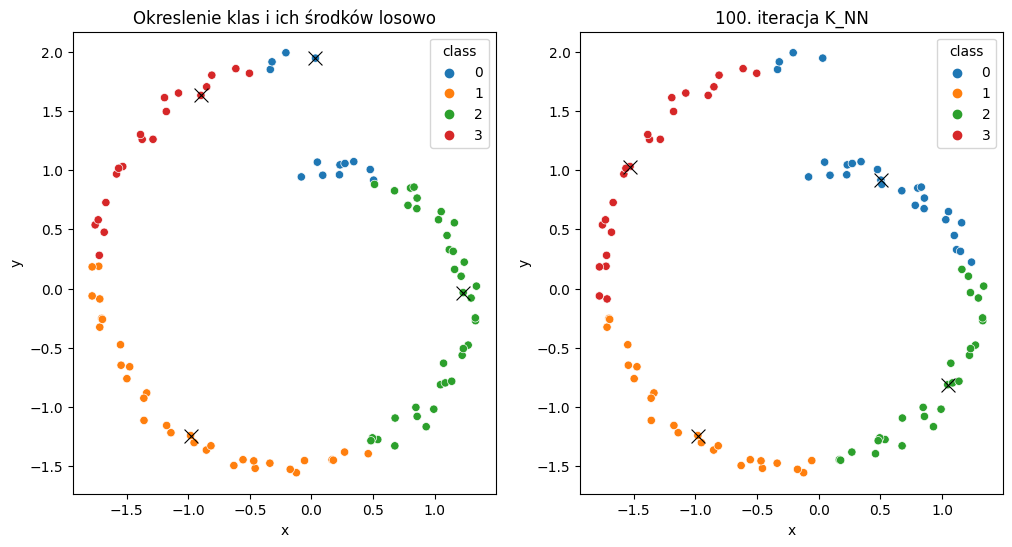

In [31]:
import random
import seaborn as sns
import matplotlib.pyplot as plt

def grupuj(lista):
  slownik = dict()
  for x in lista:
    if x[-1] in slownik.keys():
      slownik[x[-1]].append(x)
    else:
      slownik[x[-1]] = [x]
  return slownik

def k_nn(liczba_grup, iteracje, miara, lista_probek):
  fig, ax = plt.subplots(1, 2)
  fig.set_size_inches(12,6)
  indexy_srodkow = random.sample(range(0, len(lista_probek)), liczba_grup)
  srodki = [lista_probek[x] for x in indexy_srodkow]
  for i in range(iteracje):
    df_srodki = pd.DataFrame(srodki)
    df_srodki.columns = ['x','y','class']
    for sample in lista_probek:
      lista_odleglosci = [miara(sample[:-1],srodek[:-1]) for srodek in srodki]
      sample[-1] = lista_odleglosci.index(min(lista_odleglosci))
    grupy = grupuj(lista_probek)
    for key in grupy.keys():
      odleglosci = [sum([miara(point,x) for x in grupy[key]]) for point in grupy[key]]
      ind_nowego_srodka = odleglosci.index(min(odleglosci))
      srodki[key] = grupy[key][ind_nowego_srodka]
    if(i==0):
      df = pd.DataFrame(lista_probek)
      df.columns = ['x','y','class']
      sns.scatterplot(ax=ax[0],x='x', y='y', data=df, hue='class', palette="tab10")
      sns.scatterplot(ax=ax[0],x='x',y='y',data=df_srodki, s =100, marker="x", legend=False, c = "black")
      ax[0].set_title('Okreslenie klas i ich środków losowo')
  df = pd.DataFrame(lista_probek)
  df.columns = ['x','y','class']
  sns.scatterplot(ax=ax[1],x='x', y='y', data=df, hue='class', palette="tab10")
  sns.scatterplot(ax=ax[1],x='x',y='y',data=df_srodki, s =100, marker="x", legend=False, c = "black")
  ax[1].set_title(f'{i+1}. iteracja K_NN')
  return lista_probek


print(k_nn(4,100,euklides,df))

TypeError: ignored

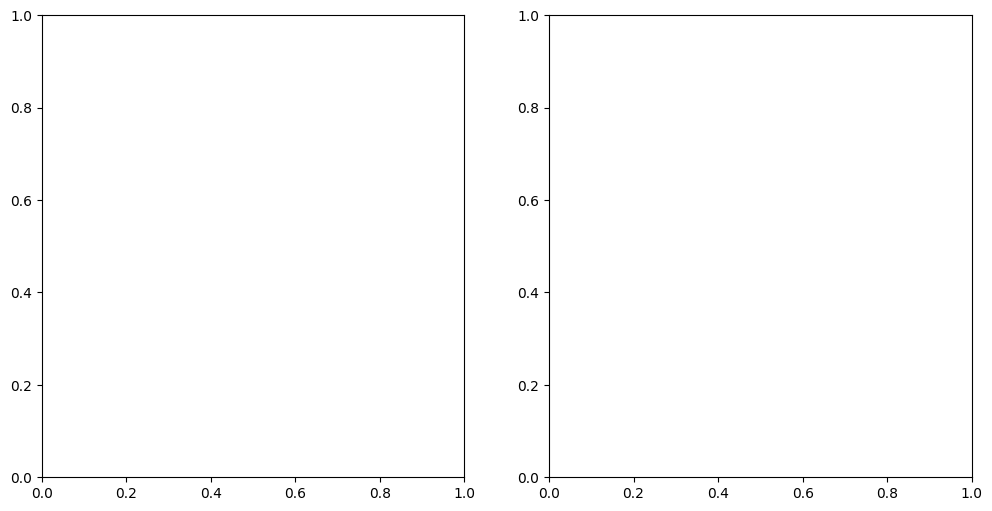

In [32]:
df[-1] = -1


def fcm(liczba_grup, iteracje, miara, lista_probek):
  fig, ax = plt.subplots(1, 2)
  fig.set_size_inches(12,6)
  srodki_x = random.sample(range(-200, 150), liczba_grup)
  srodki_x = [x/100 for x in srodki_x]
  srodki_y = random.sample(range(-150, 200), liczba_grup)
  srodki_y = [x/100 for x in srodki_y]
  srodki = [[srodki_x[i],srodki_y[i]] for i in range(liczba_grup)]
  x_value = [x[0] for x in lista_probek]
  y_value = [x[1] for x in lista_probek]
  for i in range(iteracje):
    df_srodki = pd.DataFrame(srodki)
    df_srodki.columns = ['x','y']
    for sample in lista_probek:
      lista_odleglosci = [miara(sample[:-1],srodek) for srodek in srodki]
      suma = sum(lista_odleglosci)
      sample[-1] = [x/suma for x in lista_odleglosci]
    for i in range(len(srodki)):
      weight = [x[-1][i] for x in lista_probek]
      srodek_x = sum([x_value[i]*weight[i] for i in range(len(lista_probek))])/sum(weight)
      srodek_y = sum([y_value[i]*weight[i] for i in range(len(lista_probek))])/sum(weight)
      srodki[i] = [srodek_x,srodek_y]
    if(i==0):
      df = pd.DataFrame(lista_probek[:-1])
      df.columns = ['x','y']
      sns.scatterplot(ax=ax[0],x='x', y='y', data=df, hue='class', palette="tab10")
      #sns.scatterplot(ax=ax[0],x='x',y='y',data=df_srodki, s =100, marker="x", legend=False, c = "black")
      ax[0].set_title('Okreslenie klas i ich środków losowo')
  print(lista_probek)
  df = pd.DataFrame(lista_probek[:-1])
  df.columns = ['x','y']
  sns.scatterplot(ax=ax[1],x='x', y='y', data=df, hue='class', palette="tab10")
  #sns.scatterplot(ax=ax[1],x='x',y='y',data=df_srodki, s =100, marker="x", legend=False, c = "black")
  ax[1].set_title(f'{i+1}. iteracja K_NN')
  return lista_probek

print(fcm(4,100,euklides,df))